In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#eisagogi aparaitoton biliothikon

In [355]:
# eisagogi ton dataset mou se antistixes metablites

listings = pd.read_csv('listings_cleaned.csv')
reviews = pd.read_csv('reviews.csv')

# Task 1

In [356]:
listings.shape # xrisimopoio tin methodo shape gia na dw oti exw 9455 samples (stoixia) kai 52 features(parametri gia kathe samples)

(9455, 52)

In [357]:
reviews.shape # omoios

(464791, 6)

In [358]:
listings

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,37177,Emmanouil,2009-09-08,within an hour,100%,97%,t,6.0,6.0,...,10.0,9.0,10.0,478825,t,6,6,0,0,0.23
1,10990,37177,Emmanouil,2009-09-08,within an hour,100%,97%,t,6.0,6.0,...,10.0,10.0,10.0,400315,t,6,6,0,0,0.41
2,10993,37177,Emmanouil,2009-09-08,within an hour,100%,97%,t,6.0,6.0,...,10.0,10.0,10.0,478790,t,6,6,0,0,0.53
3,10995,37177,Emmanouil,2009-09-08,within an hour,100%,97%,t,6.0,6.0,...,10.0,10.0,10.0,479159,t,6,6,0,0,0.18
4,27262,37177,Emmanouil,2009-09-08,within an hour,100%,97%,t,6.0,6.0,...,10.0,9.0,9.0,492624,t,6,6,0,0,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9450,46024742,373026252,"Loic, Estelle And Co",2020-10-23,NaN,NaN,NaN,f,0.0,0.0,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
9451,46024767,373026211,"Loic, Estelle And Co",2020-10-23,NaN,NaN,NaN,f,0.0,0.0,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
9452,46024768,373026284,"Loic, Estelle And Co",2020-10-23,NaN,NaN,NaN,f,0.0,0.0,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
9453,46031805,357673226,Maria,2020-07-21,NaN,NaN,NaN,f,1.0,1.0,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [359]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
...,...,...,...,...,...,...
464786,45525740,668453158,2020-09-27,182569726,Karolina,It was very nice
464787,45586950,669850452,2020-10-01,24767762,Julian,Una excelente experiencia.\nFue un acierto ele...
464788,45589621,670848684,2020-10-04,262837487,Rachel,We had an amazing stay. The hotel was perfect ...
464789,45591405,673300303,2020-10-11,370775422,Robin,"Nous avons été très bien accueillis, le aibnb ..."


### Task 2

In [360]:
print(listings.dtypes)
print(reviews.dtypes)

id                                                int64
host_id                                           int64
host_name                                        object
host_since                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                             float64
host_total_listings_count                       float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                   

In [361]:
# Get the data types of the columns
data_types = listings.dtypes

In [362]:
# Categorize the features based on data types
numeric_features = data_types[data_types == 'float64'].index.tolist()
categorical_features = data_types[data_types == 'object'].index.tolist()
text_features = data_types[data_types == 'object'].index.tolist()
date_features = data_types[data_types == 'datetime64'].index.tolist()
boolean_features = data_types[data_types == 'bool'].index.tolist()
geographical_features = data_types[data_types == 'float64'].index.tolist()

In [363]:
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)
print("Text Features:", text_features)
print("Date Features:", date_features)
print("Boolean Features:", boolean_features)
print("Geographical Features:", geographical_features)

Numeric Features: ['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
Categorical Features: ['host_name', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'first_review', 'last_review', 'license', 'instant_bookable']
Text Features: ['host_name', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_typ

# Task 3 + Preprocessing (Handling missing values)

In [364]:
listings.isnull().any(axis=1).sum() # edw thelw na do posa rows epireazonte apo ta missing values

9455

In [365]:
listings.isnull().sum()

,0
id,0
host_id,0
host_name,4
host_since,4
host_response_time,2086
host_response_rate,2086
host_acceptance_rate,1725
host_is_superhost,4
host_listings_count,4
host_total_listings_count,4


In [366]:
# Drop the 'bathrooms' column # olokliri i stili ton bathrooms exei missing values opote kalitera na tin diagrapso apo to dataframe mou
listings = listings.drop(columns=['bathrooms'])

In [367]:
# Check for missing values in the entire DataFrame
print(listings.isnull().sum().sum())

34937


In [368]:
# Creating an indicator for missing 'review_scores_rating'   # paratiro oti sta review scores iparxoun missing values ta opoia ofilonte epidi den efise kapoios kritiki
listings['review_scores_rating_missing'] = listings['review_scores_rating'].isnull().astype(int)

# Fill Missing Categorical Data:
for column in ['host_name', 'host_since', 'host_response_time', 'host_response_rate',
               'host_acceptance_rate', 'host_is_superhost', 'host_verifications',
               'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'license',
               'first_review', 'last_review']:
    listings[column] = listings[column].fillna('Unknown')

# Imputing missing review scores with median
for column in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                'review_scores_value', 'host_listings_count', 'host_total_listings_count',
                'bedrooms', 'beds', 'reviews_per_month']:
    listings[column] = listings[column].fillna(listings[column].median())

# Recheck for missing values
print(listings.isnull().sum())

id                                              0
host_id                                         0
host_name                                       0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0


# Task 4

In [371]:
listings['neighbourhood_cleansed'].value_counts()

,count
neighbourhood_cleansed,
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,1733
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,820
ΝΕΟΣ ΚΟΣΜΟΣ,721
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,689
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,581
ΠΑΓΚΡΑΤΙ,409
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,405
ΑΚΡΟΠΟΛΗ,319
ΚΟΛΩΝΑΚΙ,317


# Task 5

In [372]:
listings['room_type'].value_counts()  #blepw oti iparxi megalo class imbalance

,count
room_type,
Entire home/apt,8270
Private room,932
Hotel room,179
Shared room,74


# Task 6

In [373]:
listings_per_bedrooms = listings['bedrooms'].value_counts() # to 33 einai logika lathos giati einai akraia timi
listings_per_bedrooms

,count
bedrooms,
1.0,6081
2.0,2603
3.0,570
4.0,133
5.0,32
6.0,27
10.0,4
7.0,2
8.0,1


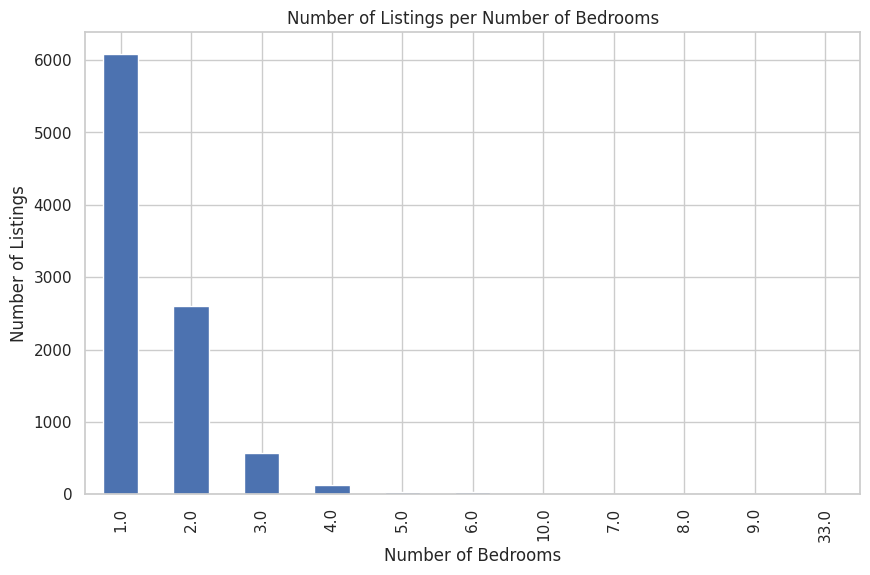

In [374]:
# Plot the distribution of listings per number of bedrooms
plt.figure(figsize=(10, 6))
listings_per_bedrooms.plot(kind='bar')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Number of Bedrooms')
plt.show()

# Task 7

In [375]:
listings_per_host = listings['host_id'].value_counts()
print(listings_per_host)

# Find the host with the maximum listings
max_listings = listings_per_host.max()  # Maximum number of listings
host_id = listings_per_host.idxmax()    # Host ID with the maximum listings

# Print the results with proper formatting
print(f'Oi max kratisis itan {max_listings} kai aniki ston {host_id}')


host_id
29927830     101
748818        70
1621474       70
135482892     69
77457889      67
            ... 
173061788      1
173080503      1
10697519       1
102433         1
357673226      1
Name: count, Length: 4995, dtype: int64
Oi max kratisis itan 101 kai aniki ston 29927830


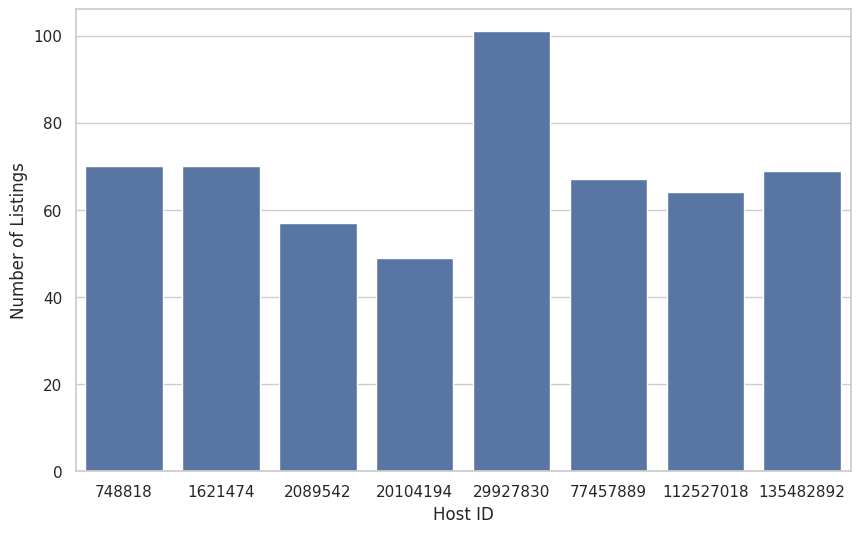

In [376]:
k = 8  # Number of top hosts to display
top_listings_per_host = listings_per_host.head(k)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_listings_per_host.index, y=top_listings_per_host.values)
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')

print()

# Task 8

In [377]:
# Convert 'host_since' to datetime format for Accurate Date Comparisons, Efficient Date Filtering, Support for Date Functions, Avoiding Errors
# Replace 'Unknown' with NaT
listings['host_since'] = listings['host_since'].replace('Unknown', pd.NaT)

# Convert 'host_since' to datetime format
listings['host_since'] = pd.to_datetime(listings['host_since'], errors='coerce')

# Find the earliest registration date
earliest_registration_date = listings['host_since'].min()

# Print the result
print(f'The earliest host registration date is: {earliest_registration_date}')

The earliest host registration date is: 2009-09-08 00:00:00


# Task 9

In [378]:
listings['registration_year'] = listings['host_since'].dt.year #edw dimiourgo mia stili pou na bazo mesa tis egrafes ton hosts ana etos afou prota to exw kanei tis morfis datatime

# Count the number of hosts registered each year
registrations_per_year = listings['registration_year'].value_counts().sort_index()

print(registrations_per_year)

# Find the year with the most registrations
most_registrations_year = registrations_per_year.idxmax()
most_registrations_count = registrations_per_year.max()

# Print the result
print(f'The year with the most host registrations is {most_registrations_year} with {most_registrations_count} registrations.')

registration_year
2009.0       7
2010.0      36
2011.0     288
2012.0     424
2013.0     383
2014.0     712
2015.0    1094
2016.0    1527
2017.0    1371
2018.0    1766
2019.0    1411
2020.0     432
Name: count, dtype: int64
The year with the most host registrations is 2018.0 with 1766 registrations.


# Task 10

In [379]:
calendar = pd.read_csv('calendar.csv')

In [380]:
calendar

,listing_id,date,available,price,minimum_nights,maximum_nights
0,536197,2020-10-25,f,$88.00,2.0,1125.0
1,10595,2020-10-26,f,$60.00,2.0,45.0
2,10595,2020-10-27,f,$60.00,2.0,45.0
3,10595,2020-10-28,f,$60.00,2.0,45.0
4,10595,2020-10-29,f,$60.00,2.0,45.0
...,...,...,...,...,...,...
1048570,23487811,2021-05-30,f,$150.00,3.0,1125.0
1048571,23487811,2021-05-31,f,$150.00,3.0,1125.0
1048572,23487811,2021-06-01,f,$150.00,3.0,1125.0
1048573,23487811,2021-06-02,f,$150.00,3.0,1125.0


In [381]:
calendar['date'] = pd.to_datetime(calendar['date']) # metatropi se datetime tis stili date apo ta data tou calendar csv

In [382]:
min_date = calendar['date'].min() #minimum date
max_date = calendar['date'].max() #maximun date

print(f'the minimun date on the calendar is {min_date} and the maximun is {max_date}')

the minimun date on the calendar is 2020-10-25 00:00:00 and the maximun is 2021-10-25 00:00:00


# Task 11

In [383]:
calendar['available'].value_counts()

,count
available,
t,763100
f,285475


In [384]:
bookings = calendar[calendar['available'] == 'f'] # an exei i stili f simenei oti einai diathesimo

In [385]:
bookings['month'] = bookings['date'].dt.month #metatripi se enan pinaka pou na fenonte oi kratisis ana mina
print(bookings['month'])

bookings_per_month = bookings['month'].value_counts().sort_index() #edw fenonte oi kratisis pou exei o kathe minas
print(bookings_per_month)

0          10
1          10
2          10
3          10
4          10
           ..
1048570     5
1048571     5
1048572     6
1048573     6
1048574     6
Name: month, Length: 285475, dtype: int32
month
1     19092
2     19409
3     20486
4     20448
5     25885
6     23616
7     23594
8     25489
9     24051
10    30936
11    29697
12    22772
Name: count, dtype: int64


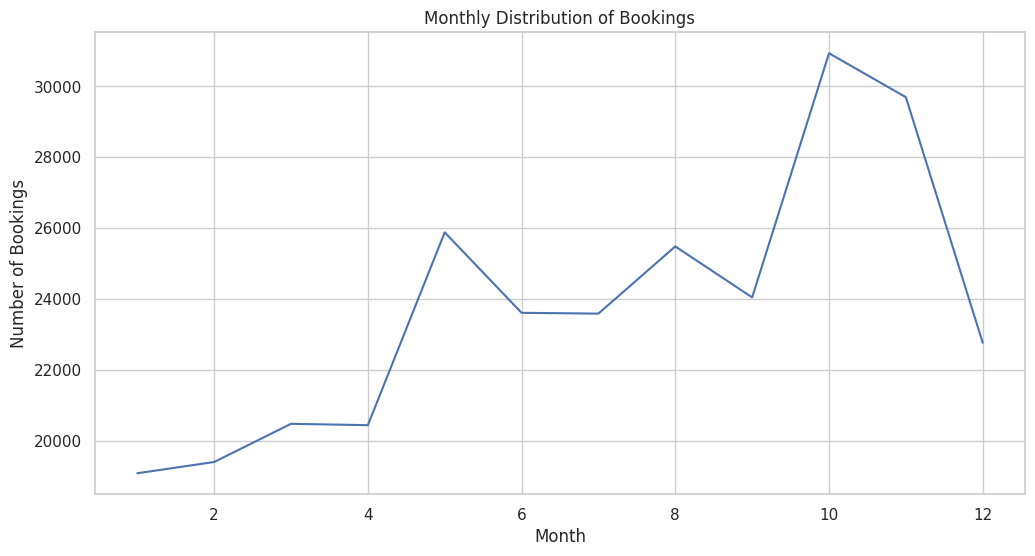

In [386]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=bookings_per_month.index, y=bookings_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Distribution of Bookings')
plt.show()


# Task 12

In [387]:
listings['price'] # edw to dtype einai object eno kanonika einai float epireazete apo ta simbola $ kai , ta opoia tha prepei na petaxtoun gia na mporo na kanw ipologismous

,price
0,$60.00
1,$36.00
2,$33.00
3,$36.00
4,$38.00
...,...
9450,"$1,000.00"
9451,"$1,000.00"
9452,"$1,000.00"
9453,$20.00


In [388]:
# Remove '$' and ',' from the price column, then convert it to float
calendar['price'] = calendar['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [389]:
# Convert 'date' column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

# Extract the month from the 'date' column
calendar['month'] = calendar['date'].dt.month

In [390]:
# Group the data by month and calculate the average price
average_price_per_month = calendar.groupby('month')['price'].mean()

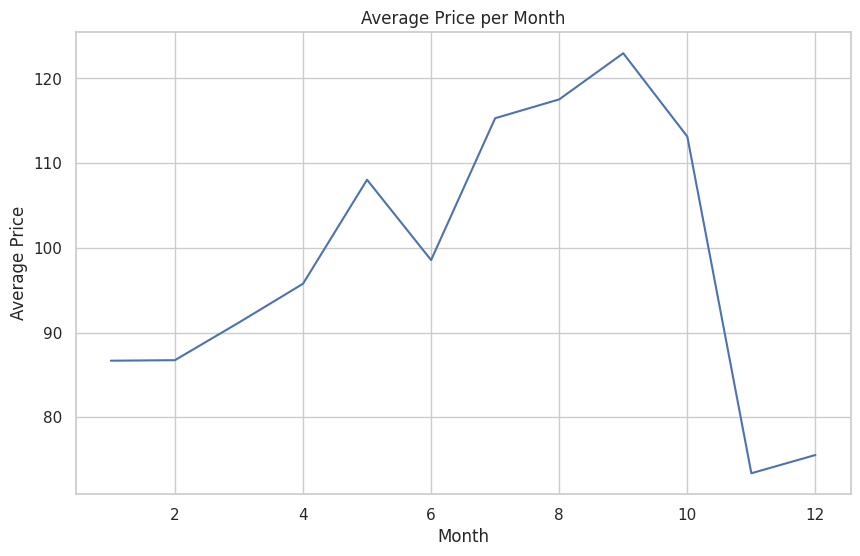

In [391]:
# Plot the average prices per month
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_price_per_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price per Month')
plt.show()

# Task 13

In [392]:
listings['host_identity_verified'].value_counts()

,count
host_identity_verified,
t,6262
f,3189
Unknown,4


In [393]:
# Count the total number of unique hosts
total_hosts = listings['host_id'].nunique()
print(total_hosts)

# Count the number of identified hosts
identified_hosts = listings[listings['host_identity_verified'] == 't']['host_id'].nunique()
print(identified_hosts)

# Step 3: Calculate the percentage of identified hosts
percentage_identified = (identified_hosts / total_hosts) * 100
print(percentage_identified)

4995
2610
52.25225225225225


# Task 14

In [394]:
listings['amenities'] # miazi me lista alla einai string stin ousia opote thelw na tin kano kanoniki lista stin python gia na mporo na kanw litourgies

,amenities
0,"[""Central heating"", ""Laundromat nearby"", ""Iron..."
1,"[""Central heating"", ""Laundromat nearby"", ""Iron..."
2,"[""Laundromat nearby"", ""Iron"", ""Kitchen"", ""Extr..."
3,"[""Central heating"", ""Extra pillows and blanket..."
4,"[""Central heating"", ""Laundromat nearby"", ""Iron..."
...,...
9450,"[""Cable TV"", ""Iron"", ""Kitchen"", ""Laptop-friend..."
9451,"[""Refrigerator"", ""Essentials"", ""Hot water"", ""S..."
9452,"[""Refrigerator"", ""Hot water"", ""Breakfast"", ""Ir..."
9453,"[""Essentials"", ""Hot water"", ""Hangers"", ""Iron"",..."


In [395]:
import ast
# Convert the string representation of lists into actual lists
listings['amenities'] = listings['amenities'].apply(lambda x: ast.literal_eval(x))

# Verify the conversion
listings['amenities'].head()

,amenities
0,"[Central heating, Laundromat nearby, Iron, Kit..."
1,"[Central heating, Laundromat nearby, Iron, Kit..."
2,"[Laundromat nearby, Iron, Kitchen, Extra pillo..."
3,"[Central heating, Extra pillows and blankets, ..."
4,"[Central heating, Laundromat nearby, Iron, Kit..."


In [396]:
from collections import Counter

# Flatten the list of all amenities
all_amenities = [item for sublist in listings['amenities'] for item in sublist]

# Count the occurrence of each amenity
amenity_counts = Counter(all_amenities)

# Display the top 10 most common amenities
top_10_amenities = amenity_counts.most_common(10)
print(top_10_amenities)

[('Wifi', 9075), ('Essentials', 8965), ('Air conditioning', 8871), ('Hair dryer', 8572), ('Hangers', 8515), ('Kitchen', 8497), ('TV', 8233), ('Shampoo', 8084), ('Iron', 7980), ('Heating', 7877)]


# Task 15

In [397]:
# Filter the listings with review_scores_rating greater than 99.5 (den to xekatharise to task alla ipothetika top rating einai to 100 sta 100)
top_rated_listings = listings[listings['review_scores_rating'] > 99.5]

# Count how many top-rated listings each host has
host_listing_counts = top_rated_listings['host_id'].value_counts()

host_listing_counts.sort_values(ascending= False)
print(host_listing_counts.head(10))


host_id
114156592    16
1167063      15
220022946    12
53824000     12
259969589    12
149346682    11
47038350     11
748818       10
248174010    10
187720552    10
Name: count, dtype: int64


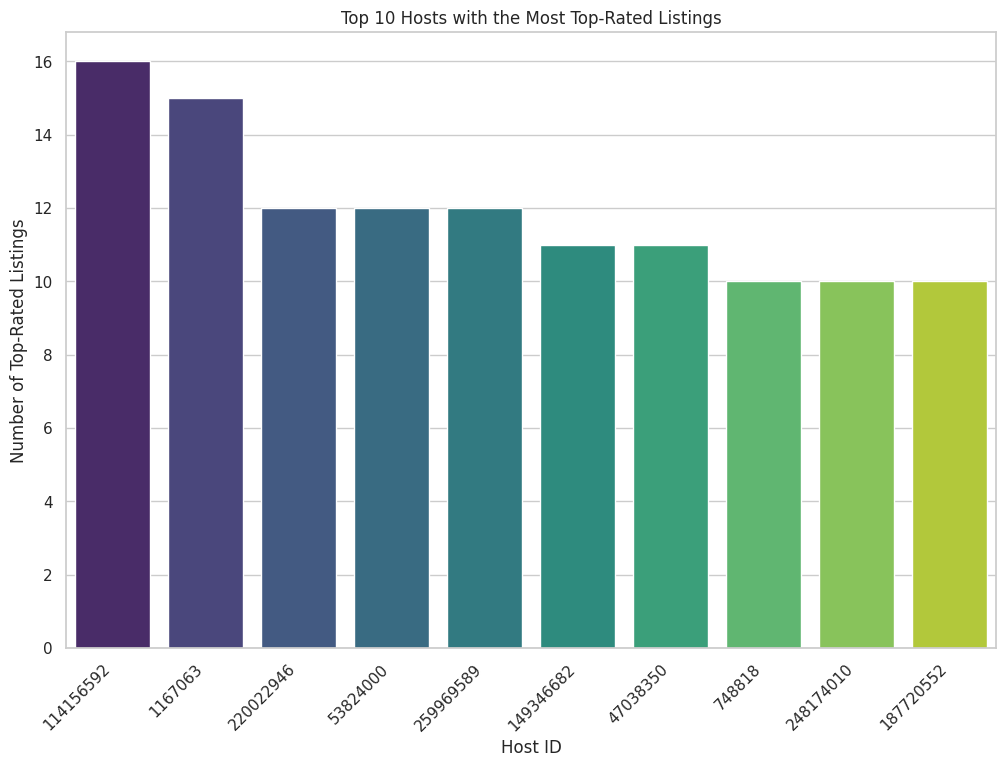

In [398]:
# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=host_listing_counts.head(10).index.astype(str), y=host_listing_counts.head(10), palette='viridis')

# Label the plot
plt.xlabel('Host ID')
plt.ylabel('Number of Top-Rated Listings')
plt.title('Top 10 Hosts with the Most Top-Rated Listings')
plt.xticks(rotation=45, ha='right')  # Rotate host IDs for better readability

# Display the plot
plt.show()

# Task 16

In [399]:
# Group by 'neighbourhood' and calculate the average review score
average_ratings_by_neighbourhood = listings.groupby('neighbourhood_cleansed')['review_scores_location'].mean()
print(f'o mesos oros bathmologias gia kathe topothesia einai: {average_ratings_by_neighbourhood} ')

sorted_neighbourhoods = average_ratings_by_neighbourhood.sort_values(ascending=False)
top_5_neighbourhoods = sorted_neighbourhoods.head(5)
print(f'Oi 5 kaliteres topothesies einai:{top_5_neighbourhoods}')

o mesos oros bathmologias gia kathe topothesia einai: neighbourhood_cleansed
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      9.702703
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    9.695652
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    9.094664
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      9.550725
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   9.262295
ΑΚΡΟΠΟΛΗ                            9.880878
ΑΜΠΕΛΟΚΗΠΟΙ                         9.770548
ΑΝΩ ΚΥΨΕΛΗ                          9.605263
ΑΝΩ ΠΑΤΗΣΙΑ                         9.768116
ΒΟΤΑΝΙΚΟΣ                           9.662500
ΓΚΑΖΙ                               9.762500
ΓΚΥΖΗ                               9.612903
ΓΟΥΒΑ                               9.612245
ΓΟΥΔΙ                               9.773333
ΕΛΛΗΝΟΡΩΣΩΝ                         9.857143
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              9.842470
ΖΑΠΠΕΙΟ                             9.879433
ΘΗΣΕΙΟ                              9.896797
ΙΛΙΣΙΑ                              9.821839
ΚΕΡΑΜΕΙΚΟΣ                          9.590909
ΚΟΛΟΚΥΝΘΟΥ             

# Task 17

In [400]:
reviews['date'] = pd.to_datetime(reviews['date']) # ta kanw se format tipou datetime gia na mporo na kanw ipologismous

In [401]:
reviews['date_year'] = reviews['date'].dt.year
reviews['date_month'] = reviews['date'].dt.month
reviews['date_day'] = reviews['date'].dt.day

In [402]:
# Count the number of reviews per month
reviews_per_year = reviews.groupby('date_year').size()
reviews_per_year

,0
date_year,
2009,12
2010,59
2011,593
2012,1941
2013,6791
2014,16333
2015,34189
2016,60468
2017,85993


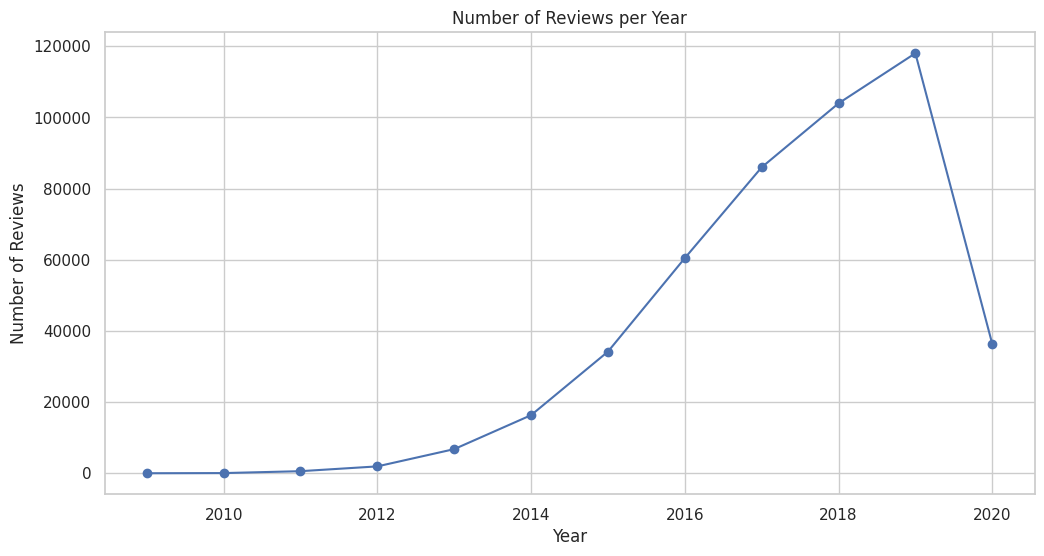

In [403]:
# Step 4: Plot the number of reviews per month
plt.figure(figsize=(12, 6))
reviews_per_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Year')
plt.show()

In [404]:
reviews_per_month = reviews.groupby('date_month').size()
reviews_per_month

,0
date_month,
1,29807
2,29952
3,31754
4,42722
5,44294
6,41519
7,46284
8,51554
9,46390


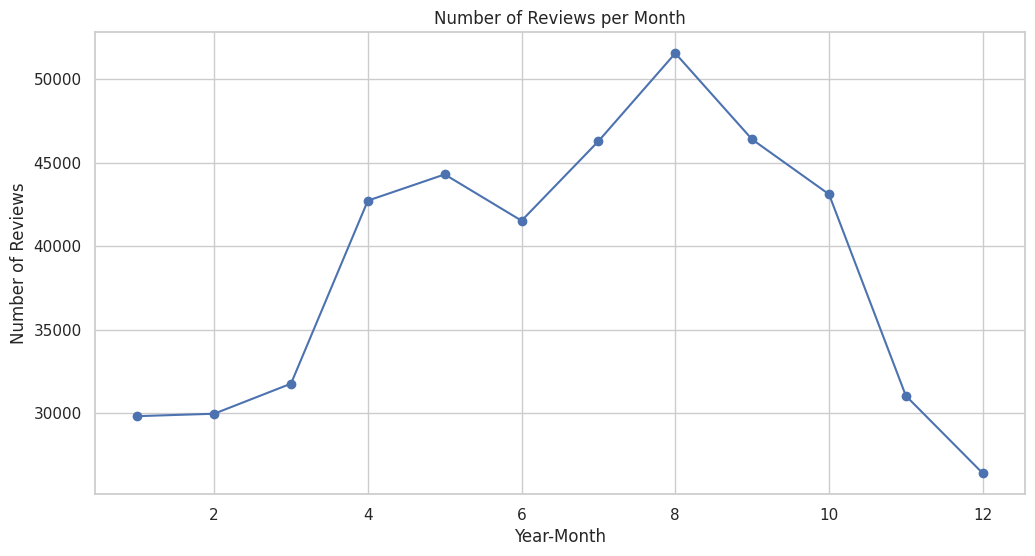

In [405]:
# Step 4: Plot the number of reviews per month
plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='line', marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Month')
plt.show()

# Task 18

In [406]:
listings['review_scores_rating']

,review_scores_rating
0,97.0
1,98.0
2,97.0
3,96.0
4,95.0
...,...
9450,97.0
9451,97.0
9452,97.0
9453,97.0


In [407]:
listings['review_scores_rating'].isnull().sum()

0

In [408]:
# Display basic information about the review_scores_rating column
print(listings['review_scores_rating'].describe())

count    9455.000000
mean       95.695717
std         6.600059
min        20.000000
25%        95.000000
50%        97.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64


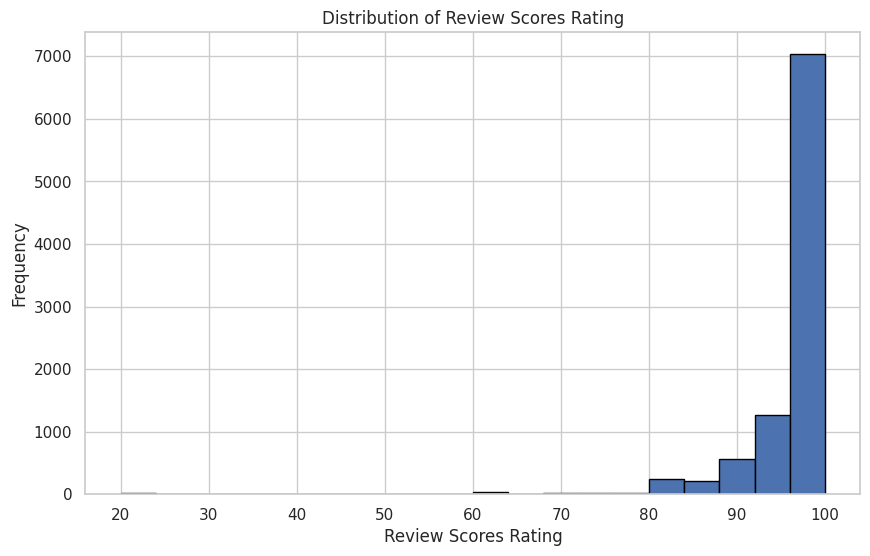

In [409]:
# Plotting the histogram of review scores
plt.figure(figsize=(10, 6))
plt.hist(listings['review_scores_rating'].dropna(), bins=20, edgecolor='black') #drop NaN numbers before the plot and split the bins i x axis
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores Rating')
plt.show()

In [410]:
# Step 1: Filter out missing review scores

existing_reviews = listings['review_scores_rating'].dropna()

# Step 2: Count the number of review scores less than 50
listings_low_score = (existing_reviews < 50).sum()
print(f'o arithmos ton bathmologion katw apo 50 einai :{listings_low_score}')

low_scores_percentage = (listings_low_score / existing_reviews.count()) * 100
print(f'kai to pososto einai  {low_scores_percentage}')


o arithmos ton bathmologion katw apo 50 einai :31
kai to pososto einai  0.32786885245901637


# Task 19

In [411]:
listings['room_type'].value_counts() #paratiro oti iparxi class imbalance

,count
room_type,
Entire home/apt,8270
Private room,932
Hotel room,179
Shared room,74


In [412]:
# Inspect the relevant columns
print(listings[['price', 'room_type']].head()) #theloyme to price na gini numeric giati einai tipou str epidi exei , $ mesa

    price        room_type
0  $60.00  Entire home/apt
1  $36.00  Entire home/apt
2  $33.00  Entire home/apt
3  $36.00  Entire home/apt
4  $38.00  Entire home/apt


In [413]:
listings['price'] = listings['price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

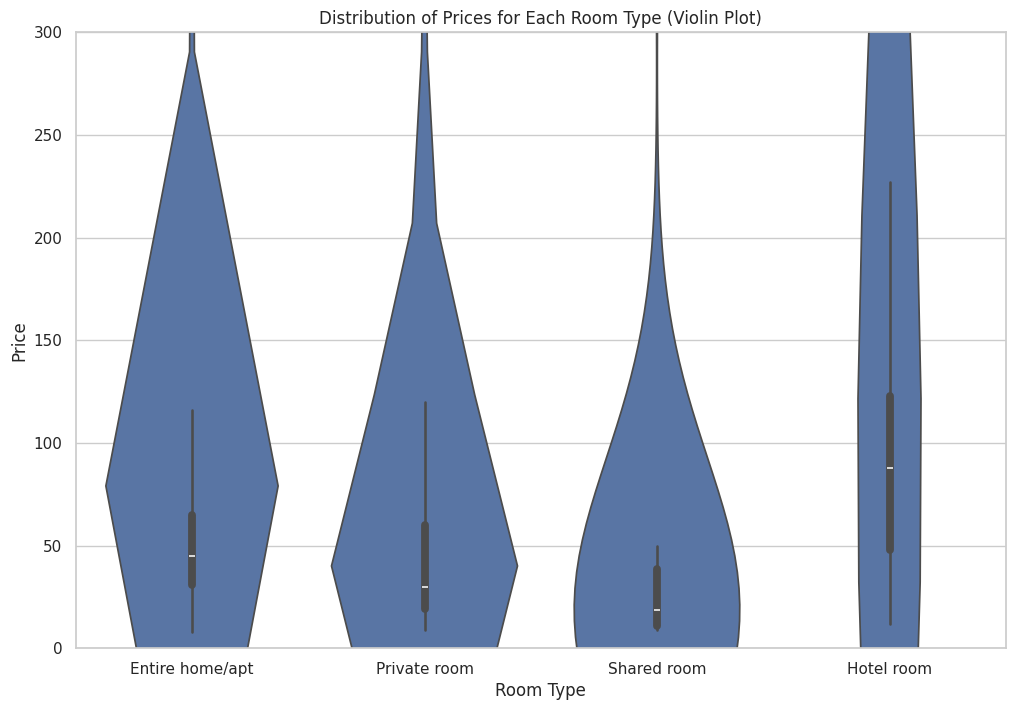

In [414]:
# Set the plot style   ### edw isos na eprepe na balo tis log times gia na fenete kalitera dioti exw megalo eyros timon kai polla stixia sto diastima 0-300
sns.set(style="whitegrid")

# Plot the distribution of prices using a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='room_type', y='price', data=listings)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Distribution of Prices for Each Room Type (Violin Plot)')

# Set the y-axis limit to 0-2000
plt.ylim(0, 300)

plt.show()

# Task 20

In [415]:
# Convert 'date' column to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

In [416]:
# Extract day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
calendar['day_of_week'] = calendar['date'].dt.day_name()
calendar['day_of_week']

,day_of_week
0,Sunday
1,Monday
2,Tuesday
3,Wednesday
4,Thursday
...,...
1048570,Sunday
1048571,Monday
1048572,Tuesday
1048573,Wednesday


In [417]:
# Clean and convert 'price' to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

In [418]:
# Group by 'day_of_week' and calculate the average price
average_price_by_day = calendar.groupby('day_of_week')['price'].mean().sort_values(ascending = False)
average_price_by_day

,price
day_of_week,
Saturday,99.359607
Sunday,99.064087
Friday,99.061182
Thursday,98.847043
Monday,98.585014
Tuesday,98.506366
Wednesday,98.467990


# Task 21

In [419]:
listings['amenities'] #apantithike se proigoumeno erotima

,amenities
0,"[Central heating, Laundromat nearby, Iron, Kit..."
1,"[Central heating, Laundromat nearby, Iron, Kit..."
2,"[Laundromat nearby, Iron, Kitchen, Extra pillo..."
3,"[Central heating, Extra pillows and blankets, ..."
4,"[Central heating, Laundromat nearby, Iron, Kit..."
...,...
9450,"[Cable TV, Iron, Kitchen, Laptop-friendly work..."
9451,"[Refrigerator, Essentials, Hot water, Stove, T..."
9452,"[Refrigerator, Hot water, Breakfast, Iron, Ele..."
9453,"[Essentials, Hot water, Hangers, Iron, Elevato..."


# Task 22

In [420]:
# Select numeric features
numeric_features = listings.select_dtypes(include=['float64', 'int64'])

# Calculate descriptive statistics
numeric_stats = numeric_features.describe()

# Display the statistics
print(numeric_stats)


                 id       host_id  host_listings_count  \
count  9.455000e+03  9.455000e+03          9455.000000   
mean   2.864946e+07  1.318461e+08            17.387520   
std    1.146347e+07  1.025103e+08            52.438605   
min    1.059500e+04  3.717700e+04             0.000000   
25%    2.105441e+07  3.509330e+07             1.000000   
50%    3.002726e+07  1.197957e+08             3.000000   
75%    3.786253e+07  2.154966e+08            10.000000   
max    4.603472e+07  3.730263e+08           942.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count                9455.000000   9455.000000   9455.000000   9455.000000   
mean                   17.387520    399.148824    249.421357      3.919831   
std                    52.438605   3684.391979   2302.328054      2.041489   
min                     0.000000     37.949280     23.697320      1.000000   
25%                     1.000000     37.969265     23.724075      2.000000   
50%      

In [421]:
listings['price'].describe() # stin arxi den to epiase epidi itan i arxiki morfi se object alla meta tin metratropi se float mporo na kanw describe()

,price
count,9455.000000
mean,70.141195
std,416.017364
min,8.000000
25%,30.000000
50%,43.000000
75%,65.000000
max,20653.000000


We notice that several features take values ​​in several different value intervals, which means that scaling is required.

	•	host_listings_count:
	•	Mean: 17.39
	•	Std: 52.45
	•	Range: 0 to 942
This feature has a wide range and a large standard deviation, indicating a highly variable scale.

	•	accommodates:
	•	Mean: 3.92
	•	Std: 2.04
	•	Range: 1 to 16
This feature is on a smaller scale and seems more consistent.

	•	review_scores_rating:
	•	Mean: 95
	•	Std: 5.5
	•	Range: 50 to 100

This price feature is tightly centered around high scores, with a small range and low standard deviation.

	•	Wide Range: The price ranges from as low as $8 to as high as $20,653, which is an extremely broad range. This suggests that there are some listings with very high prices, which are likely outliers.
	•	High Variability: The standard deviation is $416.02, which is quite high compared to the mean price of $70.14. This further indicates that there is significant variation in the price of listings.
	•	Outliers: The maximum price of $20,653 is far above the 75th percentile of $65, suggesting that there are a few listings with exceptionally high prices that could skew the analysis if not properly handled.

  6. Next Steps:
  

	•	Standardization: Consider standardizing the features (scaling them to have a mean of 0 and a standard deviation of 1) . I am going to apply machine learning algorithms sensitive to feature scales (e.g., KNN, linear regression).
	•	Normalization: Alternatively, normalize the features to a 0-1 range if you prefer to keep all features within a similar range.


## Further Analysis

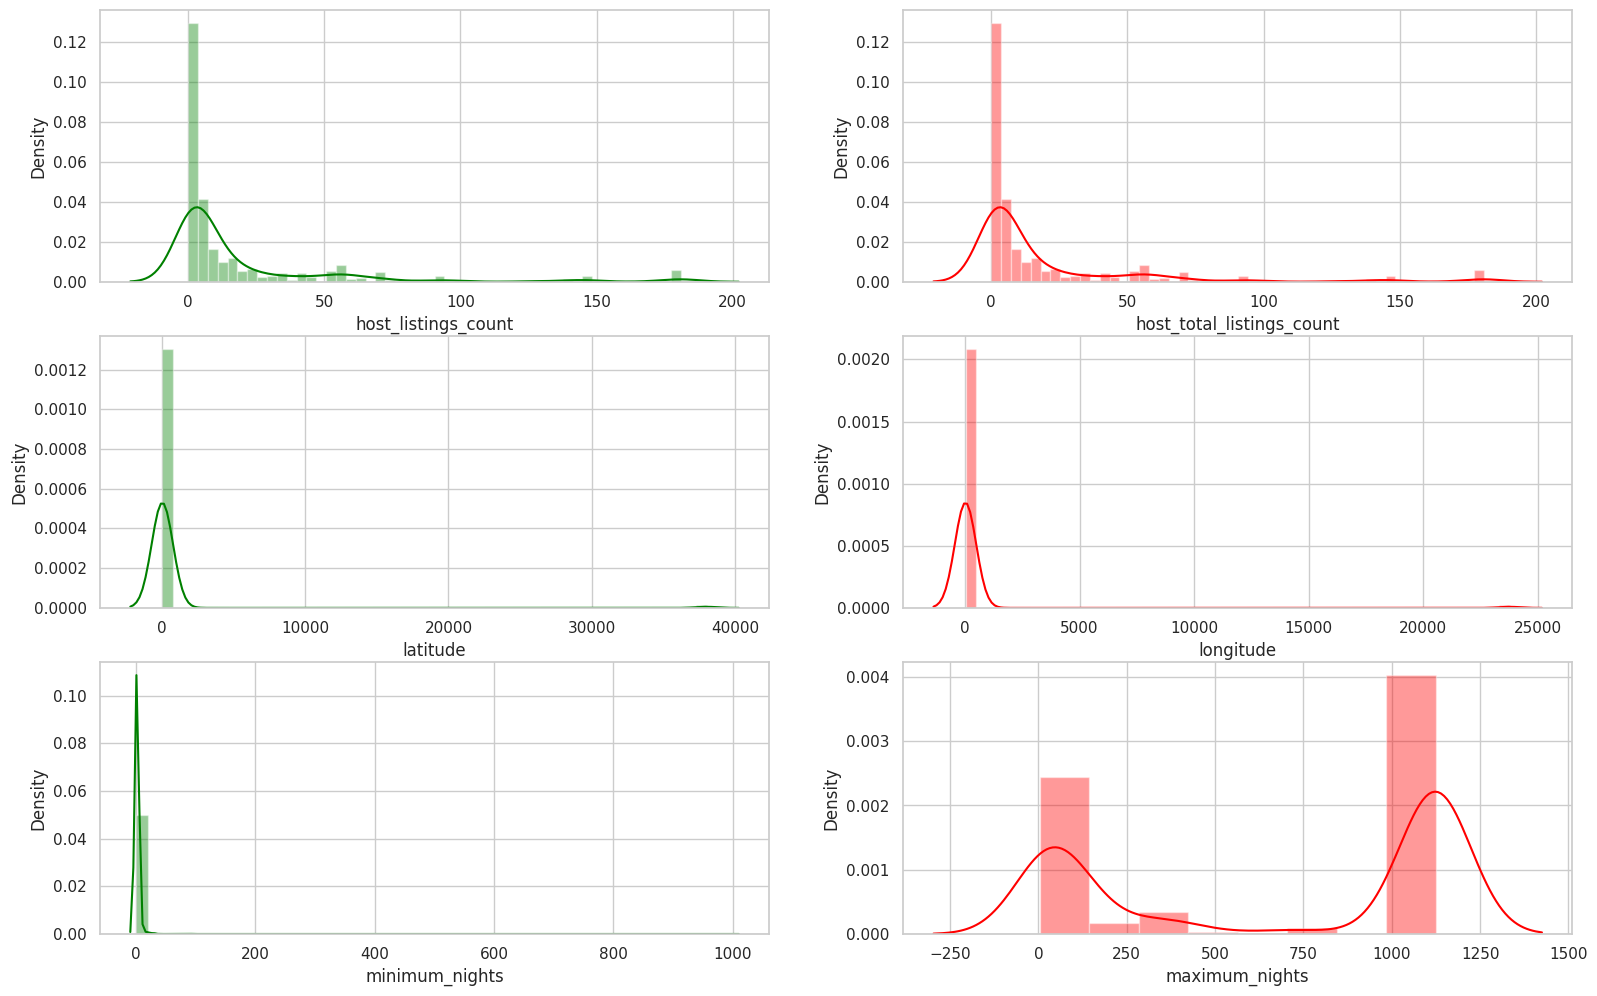

In [422]:
plt.subplots(figsize=(19,12))
plt.subplot(3,2,1)
sns.distplot(lis.host_listings_count,color='green')
plt.subplot(3,2,2)
sns.distplot(lis.host_total_listings_count,color='red')
plt.subplot(3,2,3)
sns.distplot(lis.latitude,color='green')
plt.subplot(3,2,4)
sns.distplot(lis.longitude,color='red')
plt.subplot(3,2,5)
sns.distplot(lis.minimum_nights,color='green')
plt.subplot(3,2,6)
sns.distplot(lis.maximum_nights,color='red');

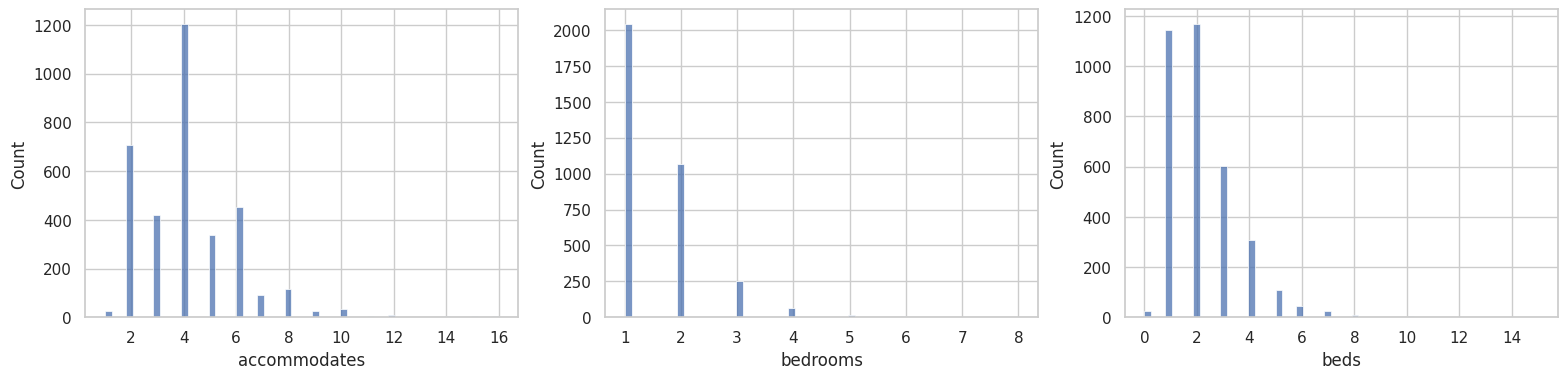

In [423]:
plt.subplots(figsize=(19,4))
plt.subplot(1,3,1)
sns.histplot(lis.accommodates)
plt.subplot(1,3,2)
sns.histplot(lis.bedrooms)
plt.subplot(1,3,3)
sns.histplot(lis.beds);

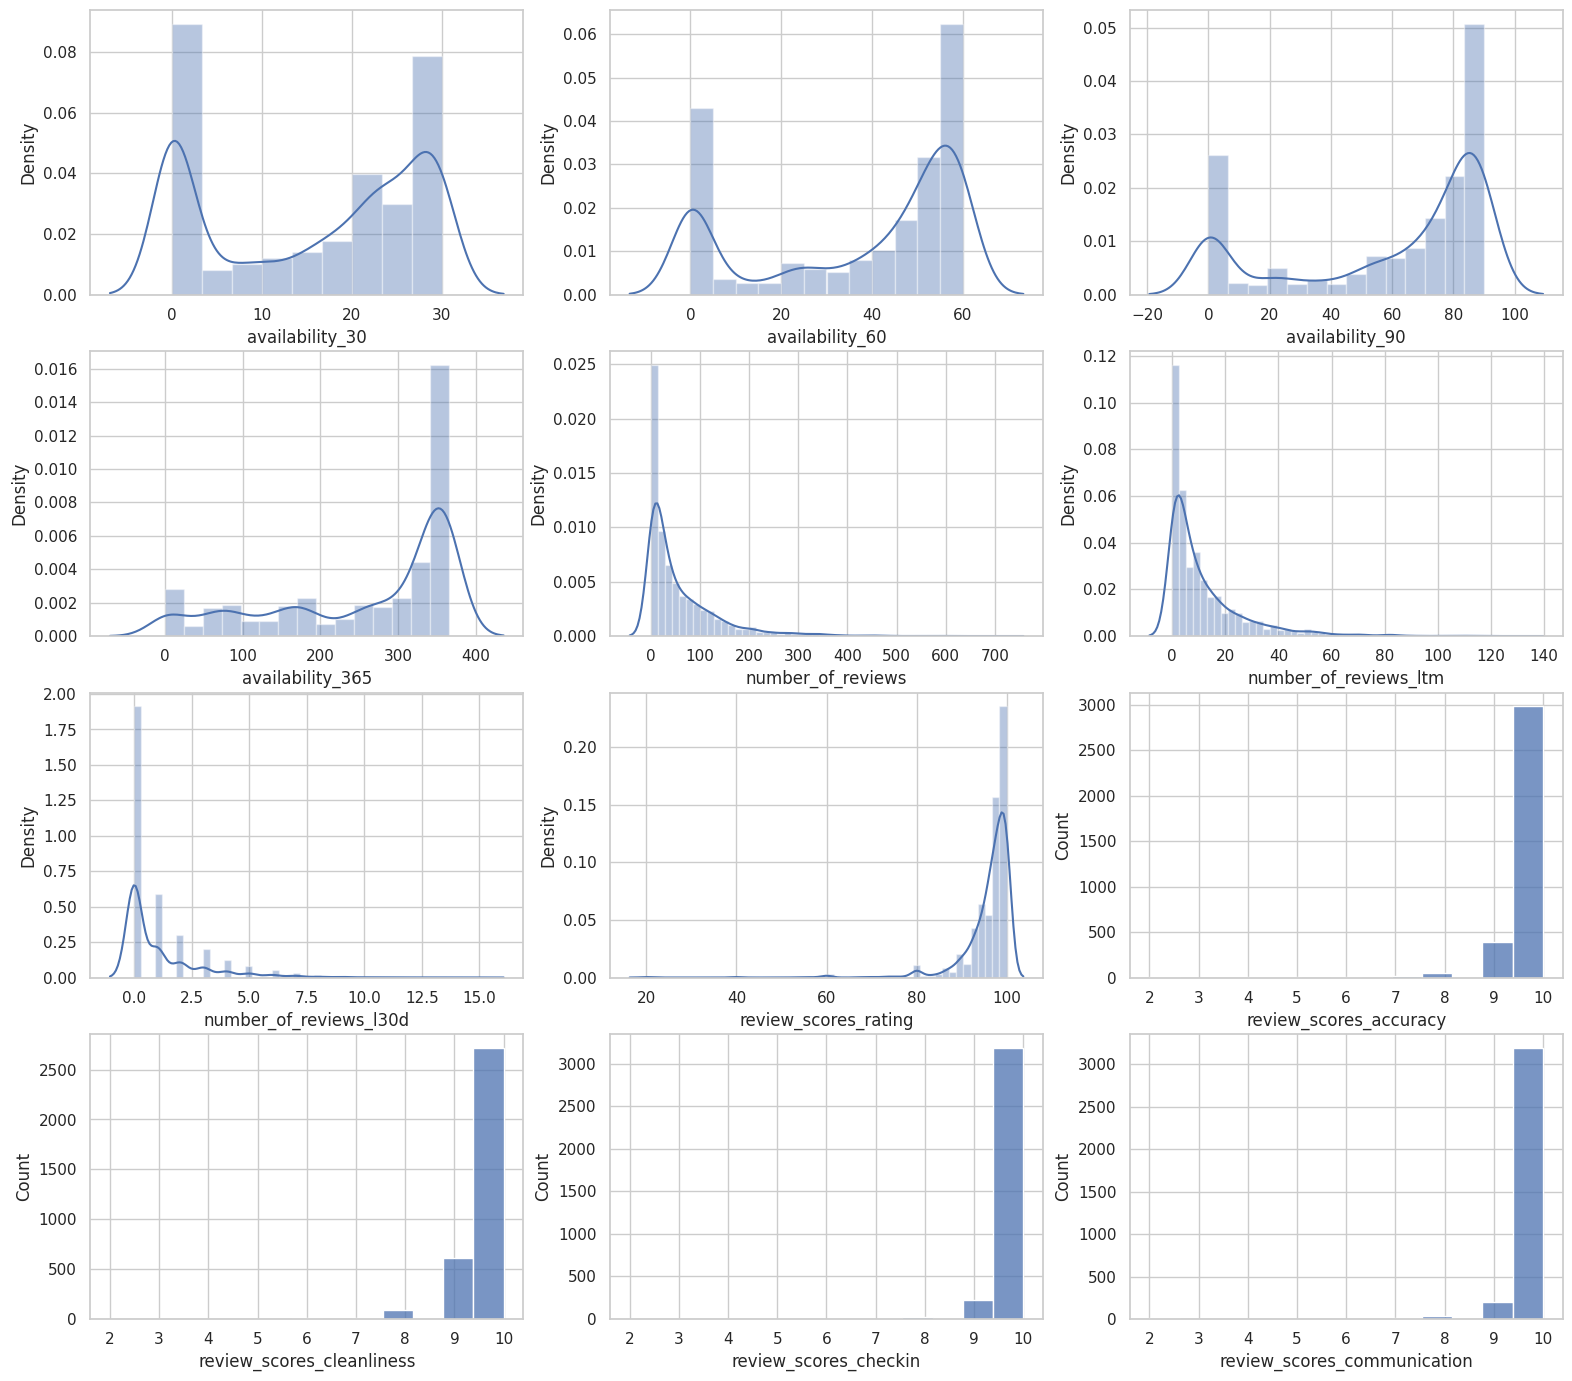

In [424]:
plt.subplots(figsize=(19,17))
plt.subplot(4,3,1)
sns.distplot(lis.availability_30)
plt.subplot(4,3,2)
sns.distplot(lis.availability_60)
plt.subplot(4,3,3)
sns.distplot(lis.availability_90)
plt.subplot(4,3,4)
sns.distplot(lis.availability_365)
plt.subplot(4,3,5)
sns.distplot(lis.number_of_reviews)
plt.subplot(4,3,6)
sns.distplot(lis.number_of_reviews_ltm)
plt.subplot(4,3,7)
sns.distplot(lis.number_of_reviews_l30d)
plt.subplot(4,3,8)
sns.distplot(lis.review_scores_rating)
plt.subplot(4,3,9)
sns.histplot(lis.review_scores_accuracy)
plt.subplot(4,3,10)
sns.histplot(lis.review_scores_cleanliness)
plt.subplot(4,3,11)
sns.histplot(lis.review_scores_checkin)
plt.subplot(4,3,12)
sns.histplot(lis.review_scores_communication);

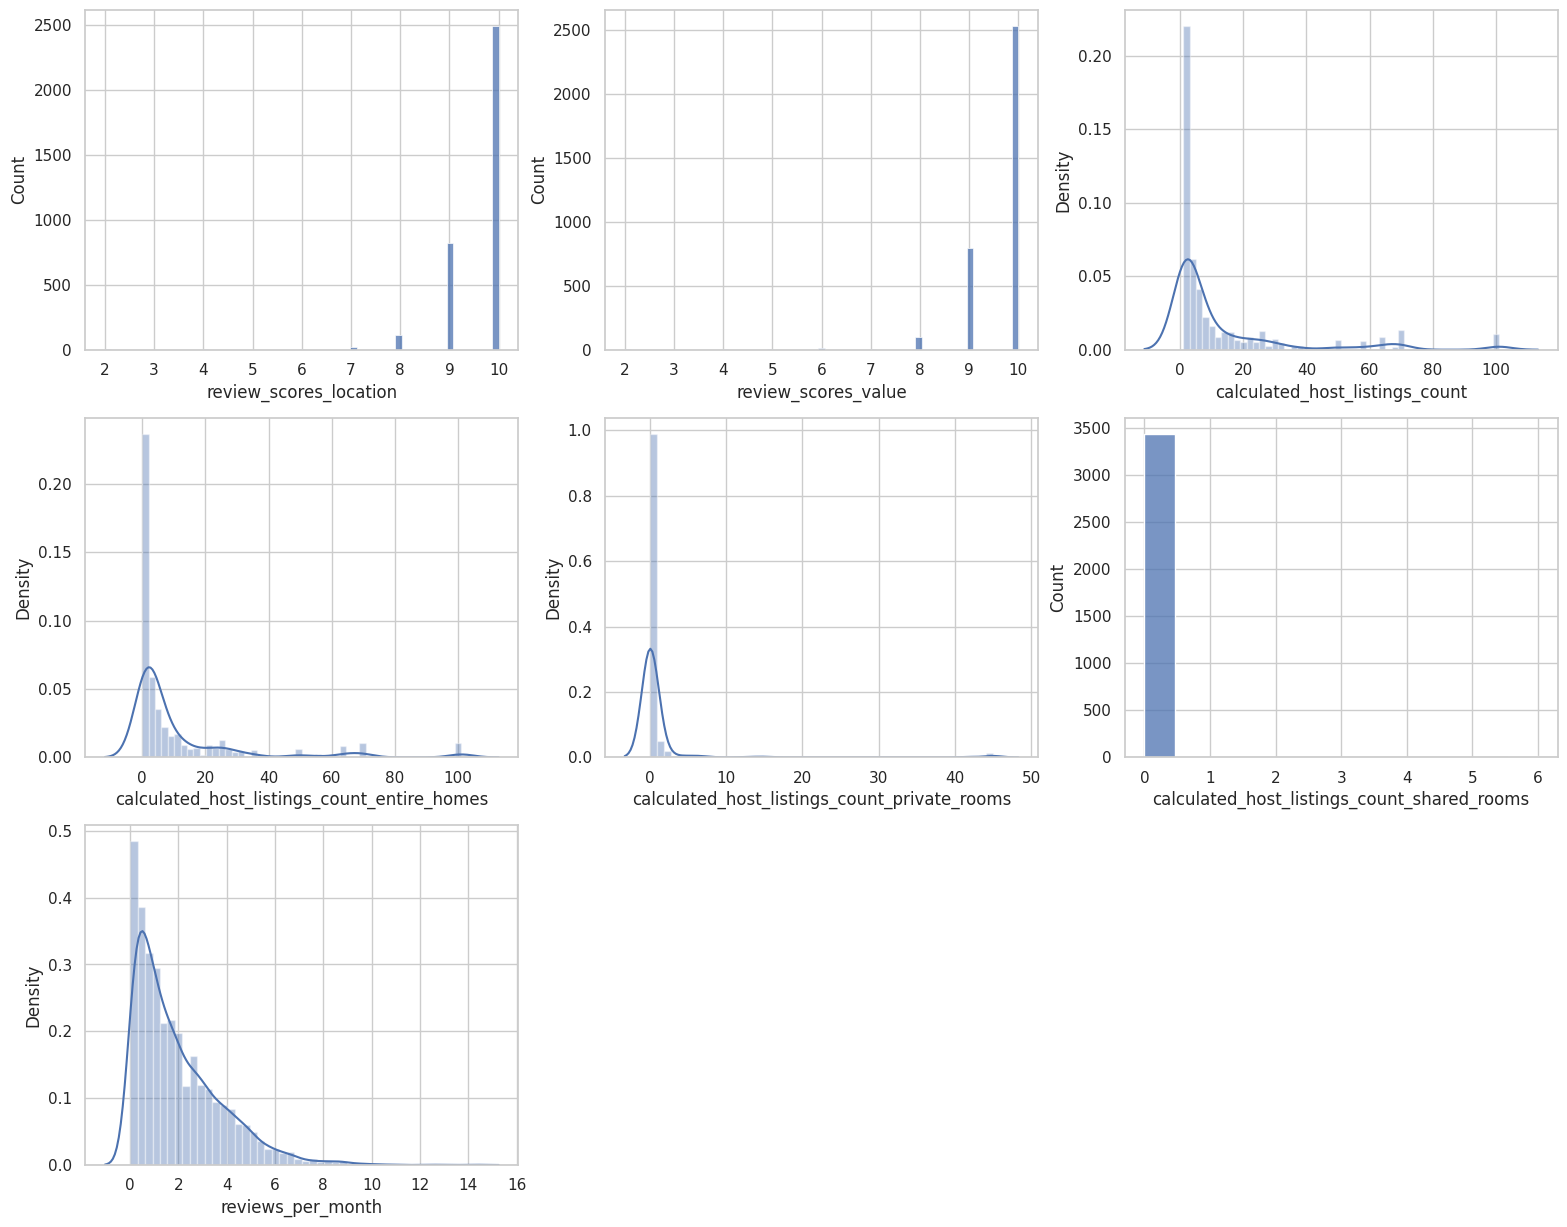

In [425]:
plt.subplots(figsize=(19,15))
plt.subplot(3,3,1)
sns.histplot(lis.review_scores_location)
plt.subplot(3,3,2)
sns.histplot(lis.review_scores_value)
plt.subplot(3,3,3)
sns.distplot(lis.calculated_host_listings_count)
plt.subplot(3,3,4)
sns.distplot(lis.calculated_host_listings_count_entire_homes)
plt.subplot(3,3,5)
sns.distplot(lis.calculated_host_listings_count_private_rooms)
plt.subplot(3,3,6)
sns.histplot(lis.calculated_host_listings_count_shared_rooms)
plt.subplot(3,3,7)
sns.distplot(lis.reviews_per_month);

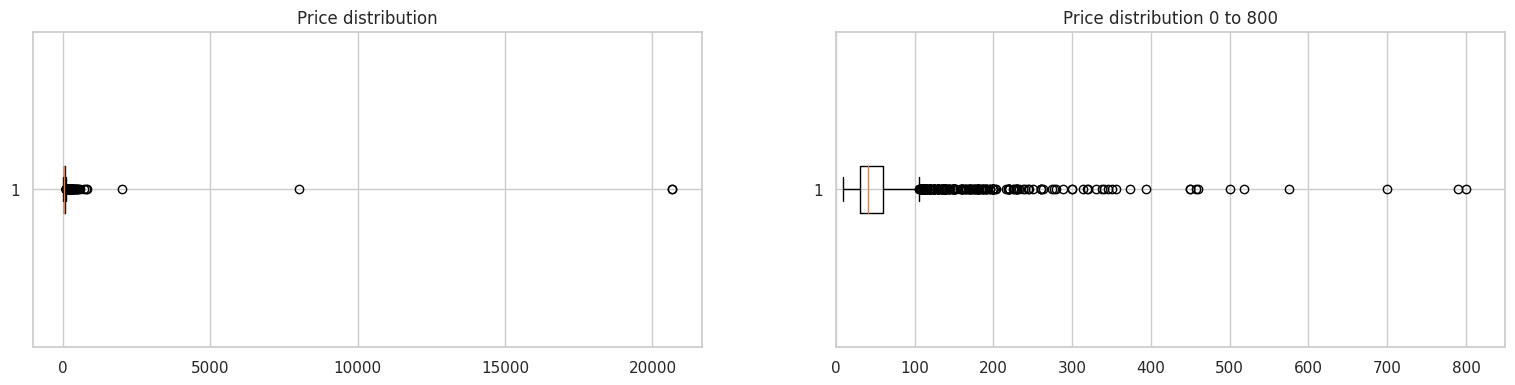

In [426]:
plt.subplots(figsize=(19,9))
plt.subplot(2,2,1)
plt.boxplot(lis.price,vert=False)
plt.title('Price distribution')
plt.subplot(2,2,2)
plt.boxplot(lis.price,vert=False)
plt.xlim([0, 850])
plt.title('Price distribution 0 to 800');

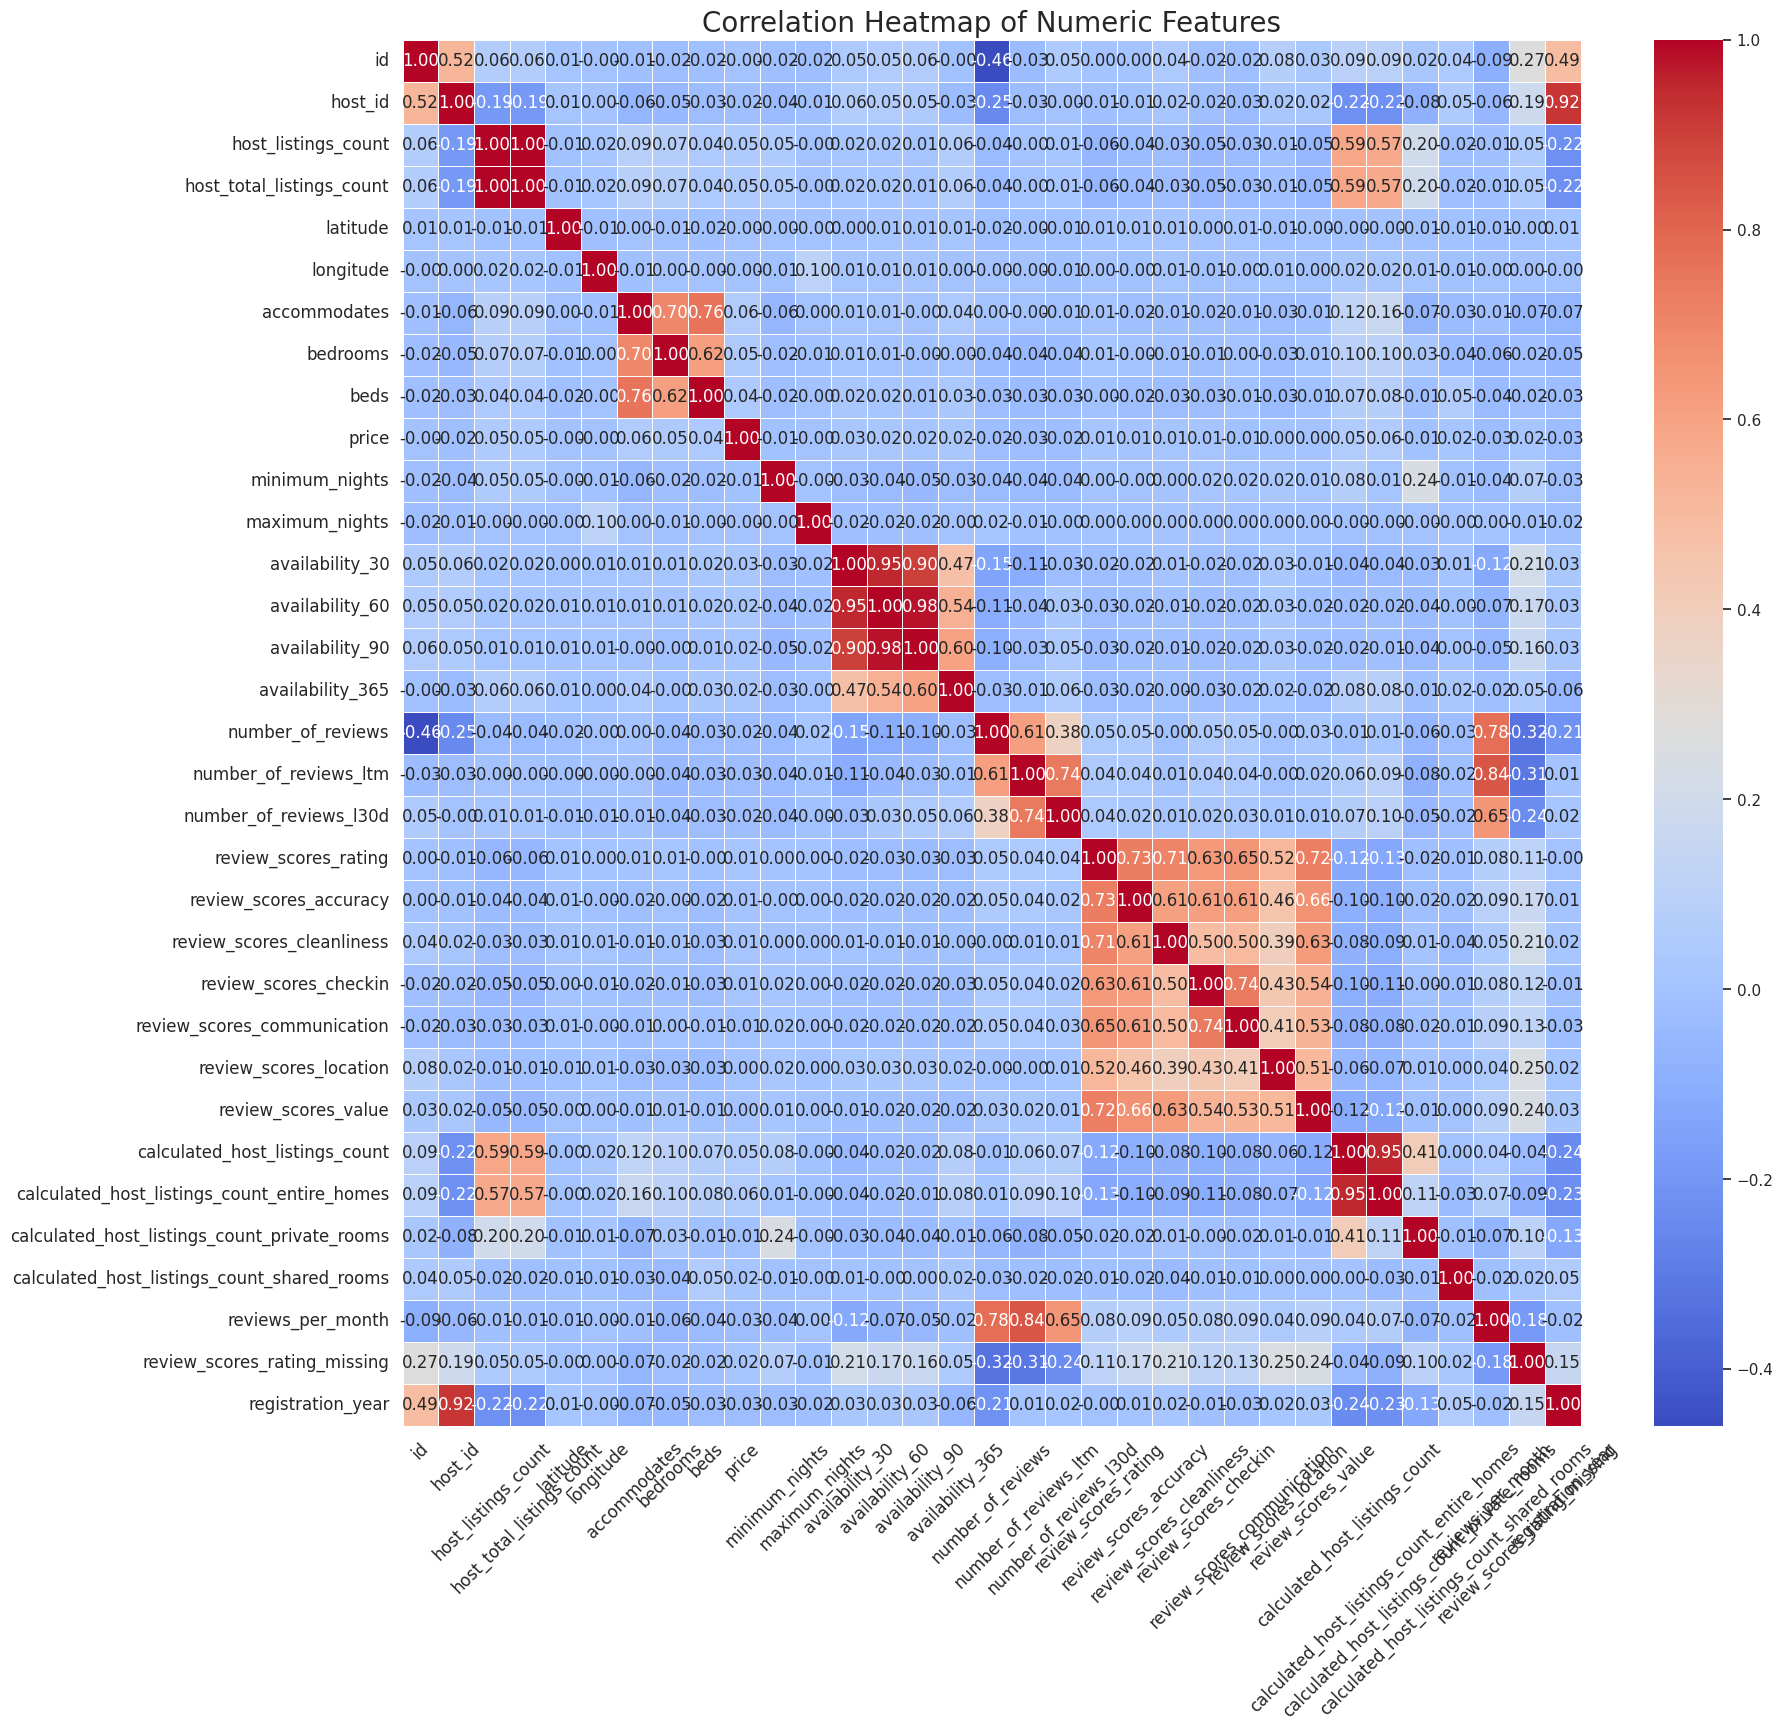

In [427]:
# Select only numeric columns
numeric_features = listings.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(19, 18))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap of Numeric Features', size=20)
plt.xticks(size=12, rotation=45)
plt.yticks(size=12, rotation=0)

# Show plot ### na ftiaxo to bathrooms giati eno einai numeric den to diabazi
plt.show()

What the Correlation Heatmap Shows

	1.	Correlation Coefficients:
	•	Values: The heatmap displays correlation coefficients between pairs of variables. The correlation coefficient ranges from -1 to 1.
	•	1: Perfect positive correlation (as one variable increases, the other increases proportionally).
	•	-1: Perfect negative correlation (as one variable increases, the other decreases proportionally).
	•	0: No correlation (no linear relationship between the variables).
	•	Colors: Typically, different colors represent different ranges of correlation coefficients, helping to quickly visualize relationships.
	2.	Strength and Direction of Relationships:
	•	Positive Correlation: Variables that increase together.
	•	Negative Correlation: Variables where one increases as the other decreases.
	•	No Correlation: No linear relationship.

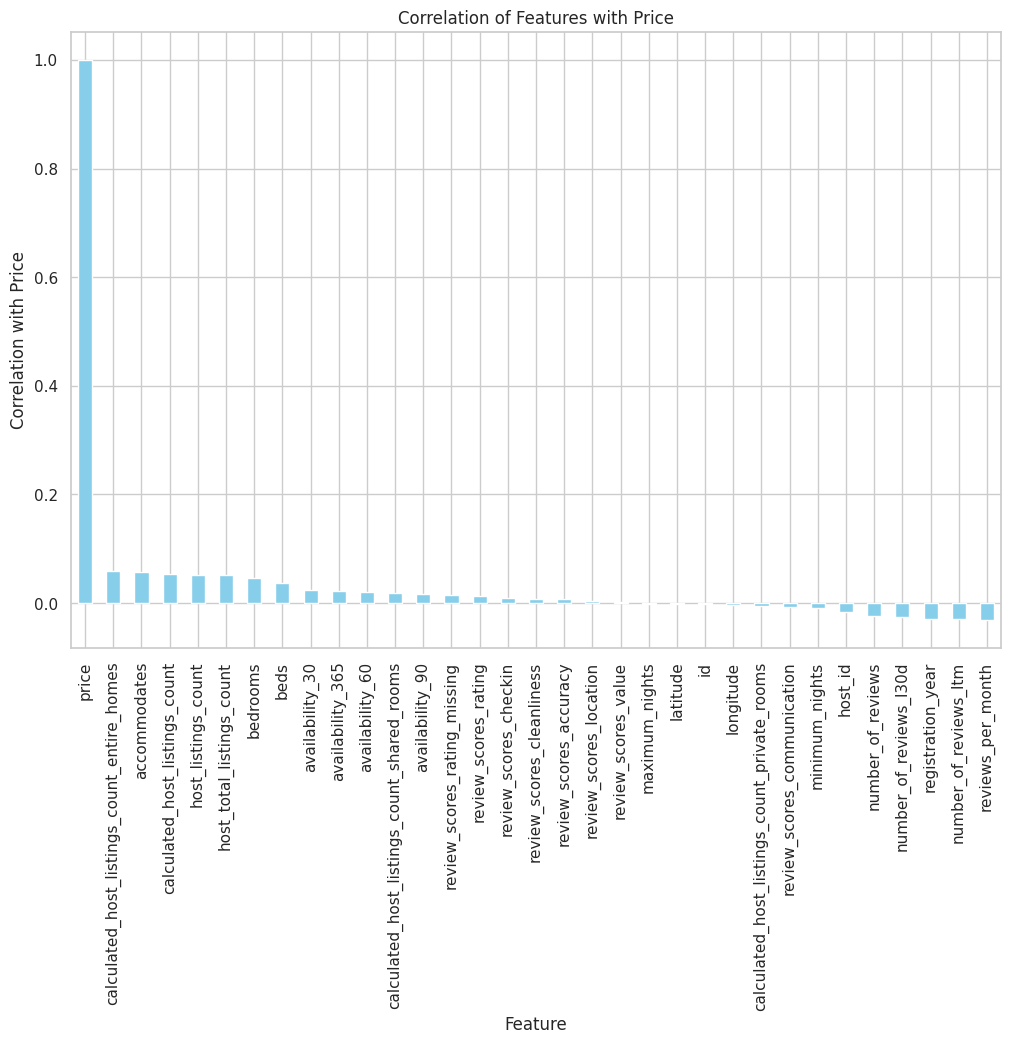

In [428]:
# Ensure 'price' column is numeric
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Select only numeric columns for correlation calculation
numeric_features = listings.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_features.corr()

# Extract correlation with 'price'
price_correlation = corr_matrix[['price']]

# Drop NaN values and sort by correlation with price
price_correlation = price_correlation.dropna().sort_values(by='price', ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 8))
price_correlation['price'].plot(kind='bar', color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Correlation with Price')
plt.title('Correlation of Features with Price')
plt.show()

# Feature Scaling

In [430]:
from sklearn.preprocessing import MinMaxScaler

# Example: Min-Max Scaling 'price' and 'bedrooms'
scaler = MinMaxScaler()
listings[['price', 'bedrooms']] = scaler.fit_transform(listings[['price', 'bedrooms']])
listings[['price', 'bedrooms']]


,price,bedrooms
0,0.002519,0.06250
1,0.001356,0.00000
2,0.001211,0.00000
3,0.001356,0.00000
4,0.001453,0.00000
...,...,...
9450,0.048050,0.03125
9451,0.048050,0.00000
9452,0.048050,0.03125
9453,0.000581,0.00000


Σε αυτό το έργο EDA στο σύνολο δεδομένων της AirBnB για την Αθήνα, διερευνήσαμε τα αρχεία listings_cleaned.csv και calendar.csv, αναλύοντας τη δομή τους, τους τύπους χαρακτηριστικών και τις ελλείπουσες τιμές. Βρήκαμε τον δειγμάτων και αριθμο χαρακτηριστικών σε κάθε αρχείο . Αξιολογήσαμε τις ελλείπουσες τιμές και ανακαλύψαμε της καταχωρίσεις που επηρεάζουν της αντίστοιχες σειρές. Η ανάλυσή μας περιλάμβανε την κατανομή των καταχωρίσεων ανά γειτονιά, τύπο δωματίου και οικοδεσπότη, αποκαλύπτοντας βασικές πληροφορίες, όπως οι περισσότερες καταχωρίσεις που κατείχε ένας μόνο οικοδεσπότης και η ημερομηνία της πρώτης εγγραφής του οικοδεσπότη. Εξετάσαμε επίσης τις τάσεις των κρατήσεων, τις διακυμάνσεις των τιμών και τα μοτίβων. Τέλος, επεξεργαστήκαμε τα δεδομένα χειριζόμενοι τις ελλείπουσες τιμές και κλιμακώσαμε τα αριθμητικά χαρακτηριστικά για να προετοιμαστούμε για περαιτέρω ανάλυση και μηχανική μάθηση.